In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#constants

G = 6.67e-11
M = 1.9e30
r = [4e6,0,0,500]


def f(r,t):
    
    x,y,vx,vy = r

    Dx = vx
    Dy = vy

    R = sqrt(x**2 + y**2)

    Dvx = -G*M*x/R**3
    Dvy = -G*M*y/R**3

    return array([Dx,Dy,Dvx,Dvy])


#how do I solve this ordinary challenge with RK4? 

r = [4e6,0,0,500]

def rk4_fixed(f,r,tf=10,N=100):
    """
    
    RK4 Integrator for a fixed step size. 
    
    Start at t0 and go to tf, with N steps in between 
    
    """
    t0 = 0
    
    h = (tf - t0) /N
    
    xpoints = []
    ypoints = []
    
    tpoints = np.arange(t0,tf,h)
    for t in tpoints:
        
        rpoints.append(r)
        k1 = h*f(r,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
        #this won't work for an input of an r, otherwise it's adding .5 to everything? 
        
        ypoints.append(y)
        k1 = h*f(y,t)
        k2 = h*f(y+0.5*k1,t+0.5*h)
        k3 = h*f(y+0.5*k2,t+0.5*h)
        k4 = h*f(y+k3,t+h)
        y += (k1+2*k2+2*k3+k4)/6
        
    return xpoints,tpoints

r = [4e6,0,0,500]




Above is the eqn to solve for gravity in 2 dimensions with no other forces present. If we were to now solve this via an integrator, we would have 


In [ ]:
r = [4e6,0,0,500]
x,y,vx,vy = r

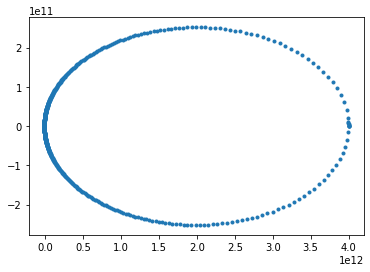

In [3]:
from pylab import *
from math import sqrt

class rksolve:

    def __init__(self,f):

        self.f = f #self.array_decorator(f)

        self.initial_conditions = None
        self.solution = None

    def iterate(self,a,b,N=1000):

        #f = self.f
        r0 = array(self.initial_conditions,float96)

        h = (b-a)/N

        tpoints = arange(a,b,h)
        solution = empty(tpoints.shape + r0.shape,float)

        #r_points[0] = r0
        r = r0
        for i,t in enumerate(tpoints):
            solution[i]=r
            r += self.estimate_delta(r,t,h)

        self.h = h
        self.solution = solution
        self.t = tpoints

    def estimate_delta(self,r,t,h):

        f = self.f
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        return (k1+2*k2+2*k3+k4)/6

class rksolve_adaptive(rksolve):

    def iterate(self,a,b,delta=1):


        r0 = array(self.initial_conditions)

        h = (b-a)/10000
        solution = []
        time = []
        r = r0
        t = a

        solution.append(copy(r))
        time.append(t)

        ro = 1
        while t<b:	
            if ro<2:
                h = h*ro**(1/4)
            else:
                h*=2
            # estimating ro
            r1 = r + self.estimate_delta(r,t,h)
            r1 += self.estimate_delta(r1,t+h,h)			
            r2 = r + self.estimate_delta(r,t,2*h)
            difference = r1 - r2
            ro = 30*h*delta/sqrt(difference[0]**2 + difference[1]**2)

            if ro>1:
                t +=2*h
                r = r1
                solution.append(copy(r))
                time.append(t)


        self.h = h
        self.solution = array(solution)
        self.t = time


G = 6.67e-11
M = 1.9e30

def f(r,t):

    x,y,vx,vy = r

    Dx = vx
    Dy = vy

    R = sqrt(x**2 + y**2)

    Dvx = -G*M*x/R**3
    Dvy = -G*M*y/R**3

    return array([Dx,Dy,Dvx,Dvy])

prob = rksolve_adaptive(f)


R = 1.496e11
T = 3.156e7 
v = 2*pi*R/T
prob.initial_conditions = [4e12,0,0,500]

delta = 1e3/365/24/60/60
prob.iterate(0,T*50,delta=delta)


x = prob.solution[:,0]
y = prob.solution[:,1]

plot(x,y,'.')
show()